# Data Dive 4
## Real Estate Agency

### James Evans, Brent Yelle, Sabrina Peterson, Nicholas Sartino

In [13]:
# Modules

#!pip install missingno
# Comment out if not needed - used briefly to export png images from bar graphs.
#!pip install plotly-orca
#!pip install -U kaleido

In [14]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

import plotly.express as px
import plotly.io as pio

import missingno as msno


In [15]:
# Read data
df = (pd.read_csv('housing.csv', header = 0))

# Basic Data Information

In [16]:
# Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
# Basic Stats

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: >

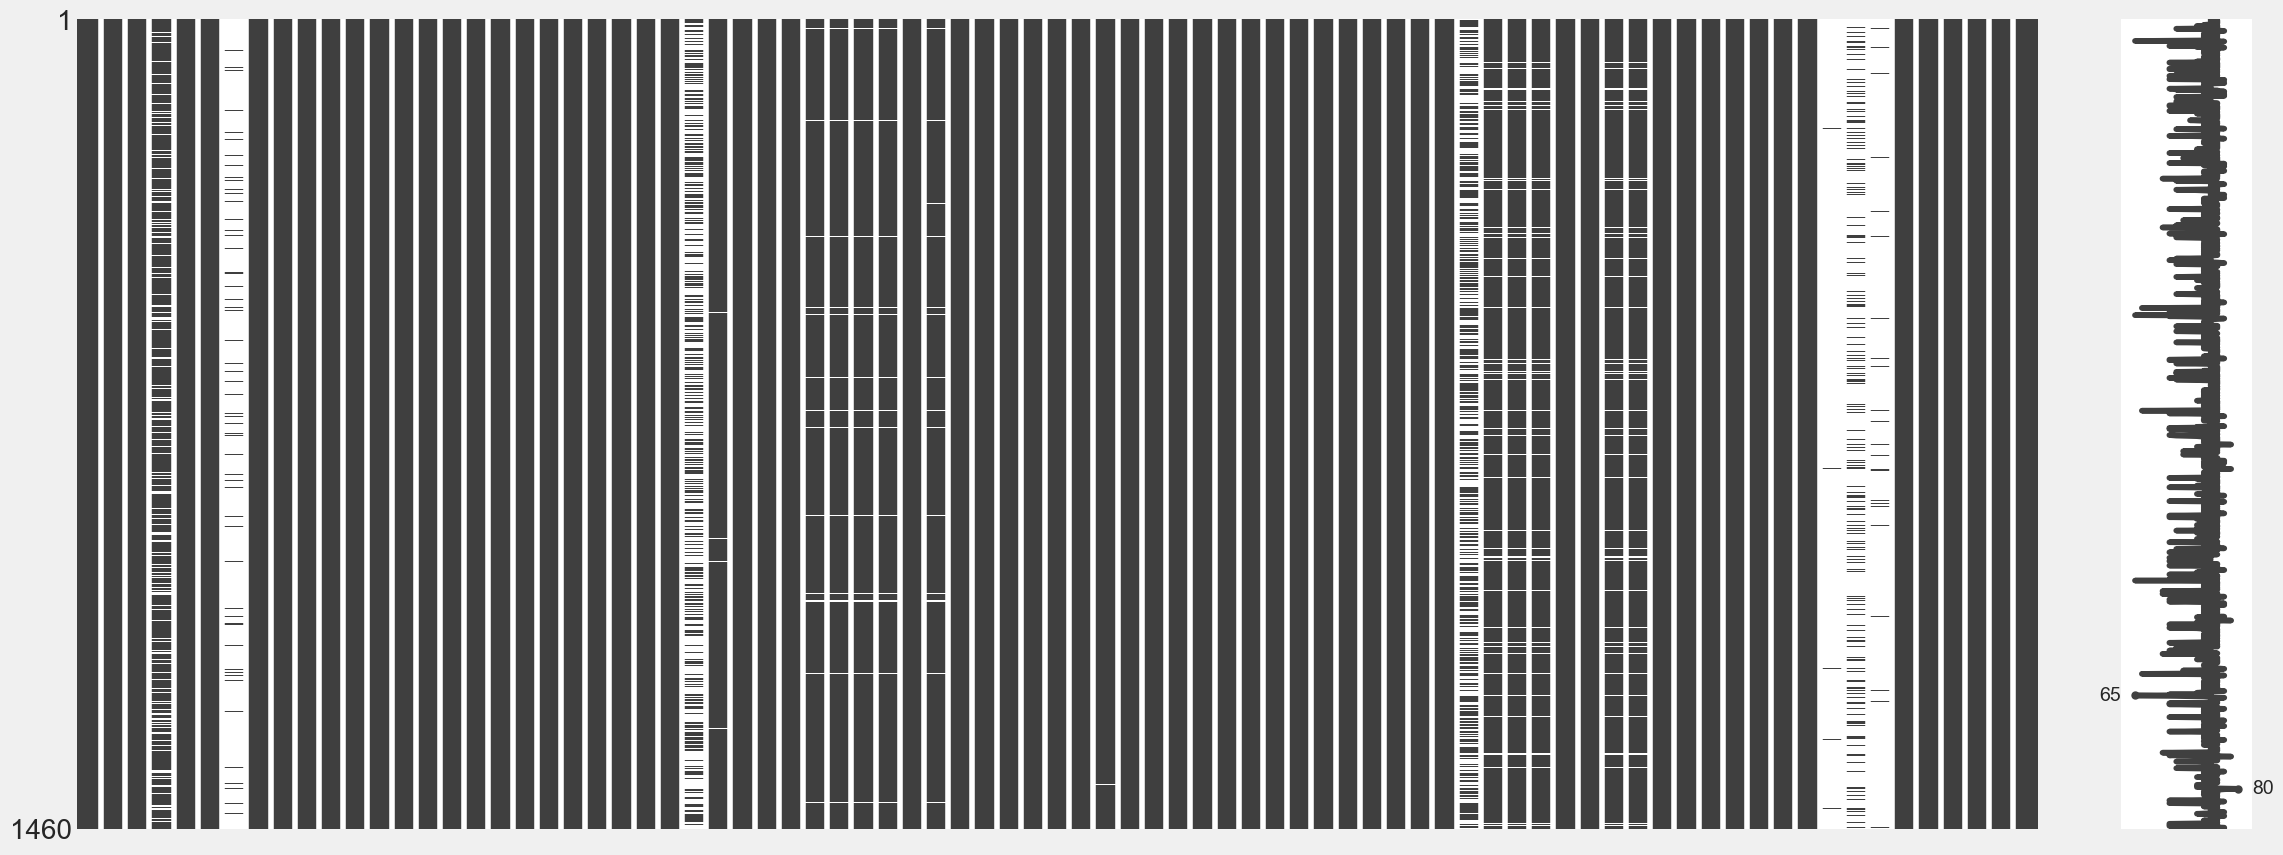

In [18]:
# Visualize missing values

msno.matrix(df)

In [31]:
# Choose the column for which you want to print distinct values
column_to_check = 'Neighborhood'

# Use the unique() function directly
distinct_values = df[column_to_check].unique()

# Print distinct values
for value in distinct_values:
    print(value)

CollgCr
Veenker
Crawfor
NoRidge
Mitchel
Somerst
NWAmes
OldTown
BrkSide
Sawyer
NridgHt
NAmes
SawyerW
IDOTRR
MeadowV
Edwards
Timber
Gilbert
StoneBr
ClearCr
NPkVill
Blmngtn
BrDale
SWISU
Blueste


In [32]:
# Join neighborhood_names and append column to dataframe for cleaner names

df_neighborhoods = (pd.read_csv('neighborhood_names', header = 0))

df_neighborhoods.drop(columns=['Unnamed: 2'],inplace=True)

# Perform the left join and select only the 'Neighborhood_info' column from the foreign table
result_df = pd.merge(df, df_neighborhoods[['Neighborhood_id', 'Neighborhood_info']], left_on='Neighborhood', right_on='Neighborhood_id', how='left')

# Drop the redundant 'Neighborhood_id' column
result_df = result_df.drop('Neighborhood_id', axis=1)

result_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_info
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,College Creek
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Veenker
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,College Creek
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Crawford
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Northridge


In [33]:
# Null Counts

result_df.isnull().sum() 

Id                     0
MSSubClass             0
MSZoning               0
LotFrontage          259
LotArea                0
                    ... 
YrSold                 0
SaleType               0
SaleCondition          0
SalePrice              0
Neighborhood_info      0
Length: 82, dtype: int64

# Visualizations by Categories

In [ ]:
# Distribution of Houses

sns.histplot(df['SalePrice'], kde=True)

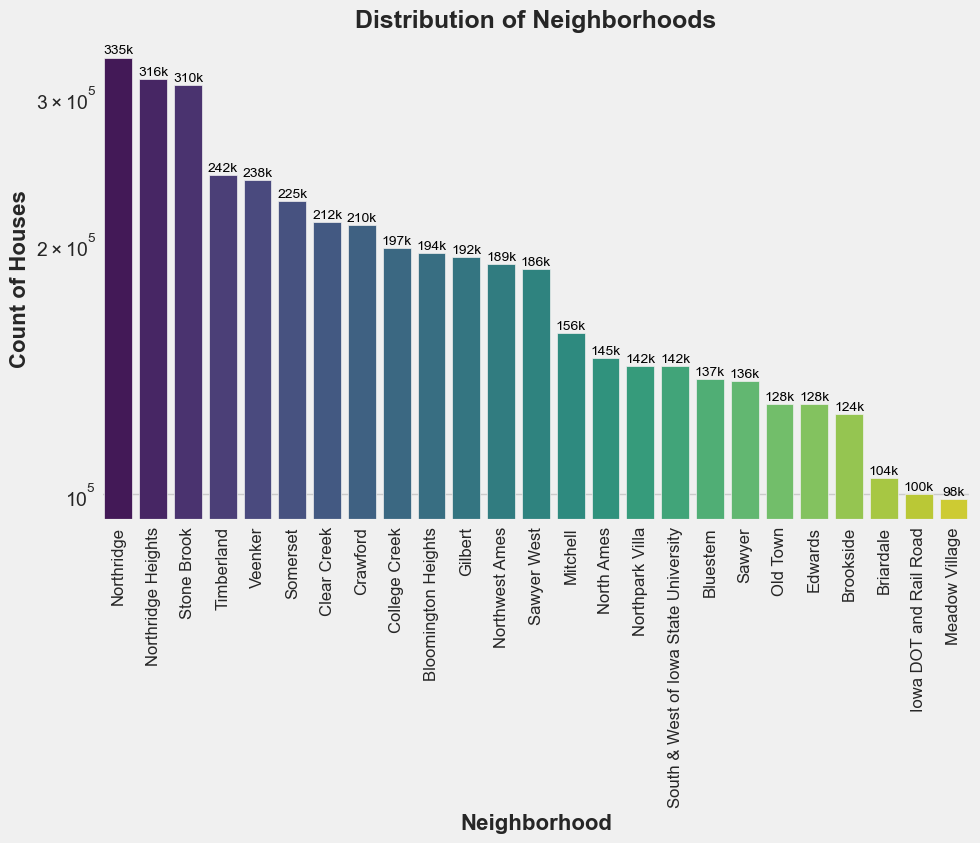

In [47]:
# group data in Neighborhood column and sum
neighborhood_mean = result_df.groupby('Neighborhood_info')['SalePrice'].mean()

# Sort the values in descending order
neighborhood_mean = neighborhood_mean.sort_values(ascending=False)


# Function to format values as '100k'
def format_value(x, pos):
    return f'{int(x/1000)}k'



# create bar plot
plt.figure(figsize= (10, 6))
ax = sns.barplot(x = neighborhood_mean.index, y = neighborhood_mean.values, palette ="viridis")
ax.set_yscale("log")
plt.title('Distribution of Neighborhoods', fontsize = 18, fontweight = 'bold')
plt.xlabel('Neighborhood', fontsize = 16, fontweight = 'bold')
plt.ylabel('Count of Houses', fontsize = 16, fontweight = 'bold')

# rotate x axis labels
plt.xticks(rotation = 90, fontsize = 12)

# display actual numbers on the bars
for p in ax.patches:
    ax.annotate(format_value(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# display result
plt.show()